In [15]:
import numpy
import matplotlib
import matplotlib.pyplot as plt

In [35]:
def mcol(v):
    return v.reshape((v.size, 1))

def load(fname):
    DList = []
    labelsList = []

    with open(fname) as f:
        for line in f:
            try:
                attrs = line.split(',')[0:-1]
                attrs = mcol(numpy.array([float(i) for i in attrs]))
                label = int(line.split(',')[-1].strip())
                DList.append(attrs)
                labelsList.append(label)
            except:
                pass

    return numpy.hstack(DList), numpy.array(labelsList, dtype=numpy.int32)

def plot_hist(D, L):

    D0 = D[:, L==0]
    D1 = D[:, L==1]

    for dIdx in range(D.shape[0]):
        plt.figure()
        plt.xlabel("Feature #{}".format(dIdx+1))
        plt.ylabel('Density')        
        plt.hist(D0[dIdx, :], bins = 10, density = True, alpha = 0.4, label = 'Fake')
        plt.hist(D1[dIdx, :], bins = 10, density = True, alpha = 0.4, label = 'Genuine')
        
        plt.legend()
        plt.tight_layout() # Use with non-default font size to keep axis label inside the figure
        # plt.savefig('hist_%d.pdf' % dIdx)
    plt.show()

def plot_scatter(D, L):
    
    D0 = D[:, L==0]
    D1 = D[:, L==1]

    for dIdx1 in range(D.shape[0]):
        for dIdx2 in range(D.shape[0]):
            if dIdx1 == dIdx2:
                continue
            plt.figure()
            plt.xlabel("Feature #{}".format(dIdx1+1))
            plt.ylabel("Feature #{}".format(dIdx2+1))
            plt.scatter(D0[dIdx1, :], D0[dIdx2, :], label = 'Fake')
            plt.scatter(D1[dIdx1, :], D1[dIdx2, :], label = 'Genuine')
        
            plt.legend()
            plt.tight_layout() # Use with non-default font size to keep axis label inside the figure
            # plt.savefig('scatter_%d_%d.pdf' % (dIdx1, dIdx2))
        plt.show()

In [36]:
# Change default font size - comment to use default values
plt.rc('font', size=16)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)

D, L = load('../labs/lab2/data/trainData.txt')

In [37]:
print(D.shape)
print(L.shape)

(6, 6000)
(6000,)


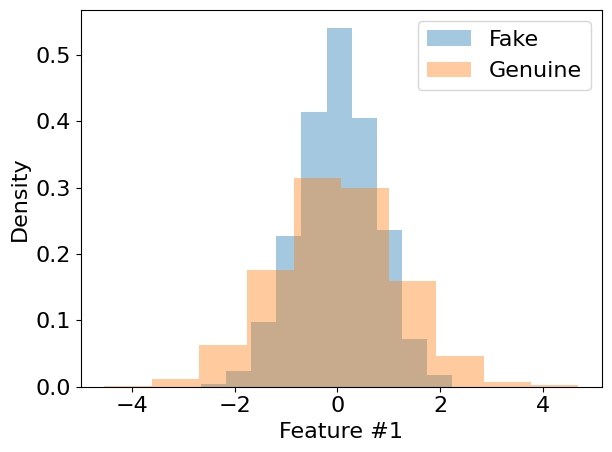

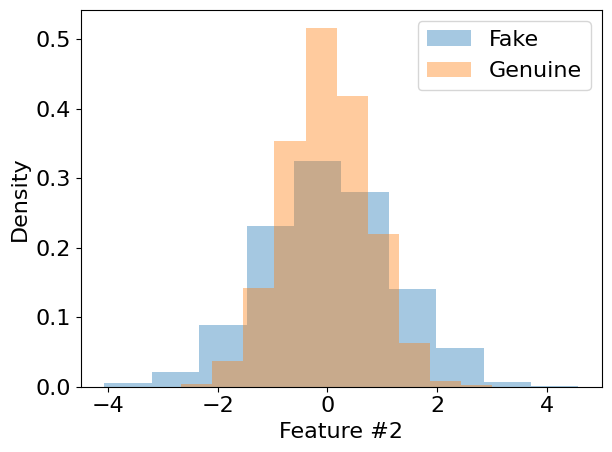

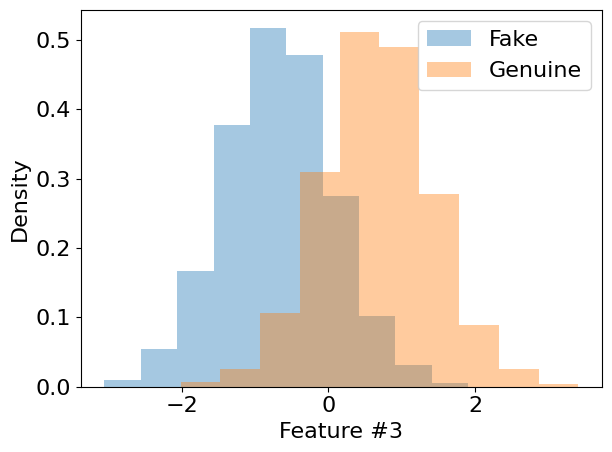

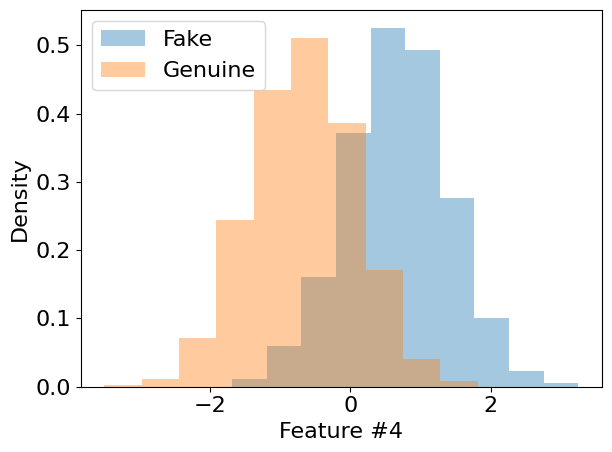

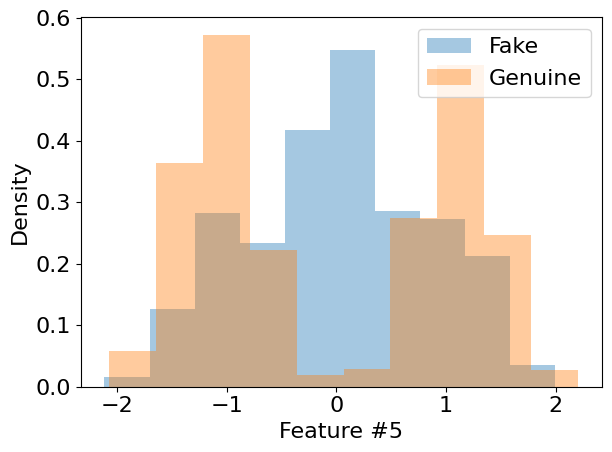

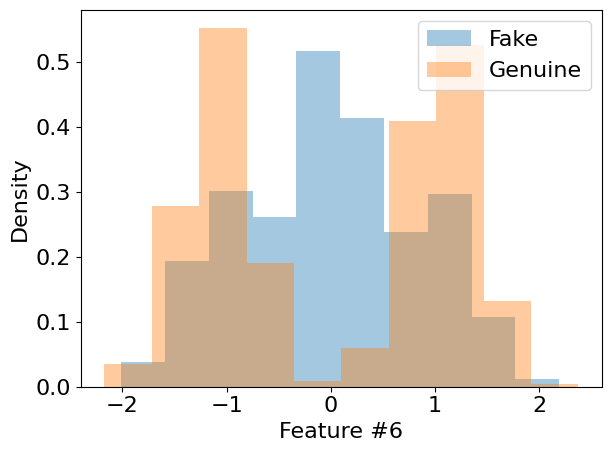

In [38]:
plot_hist(D, L)

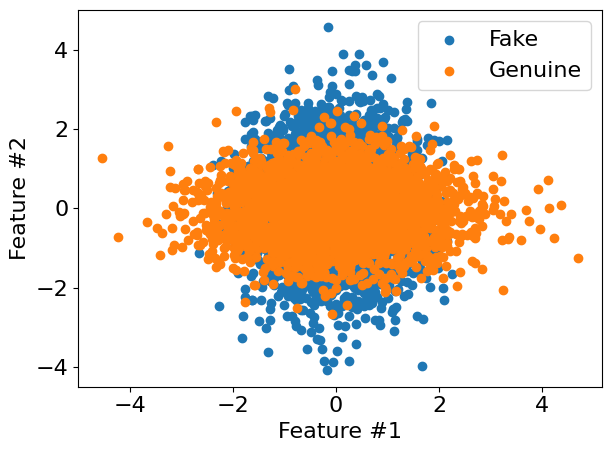

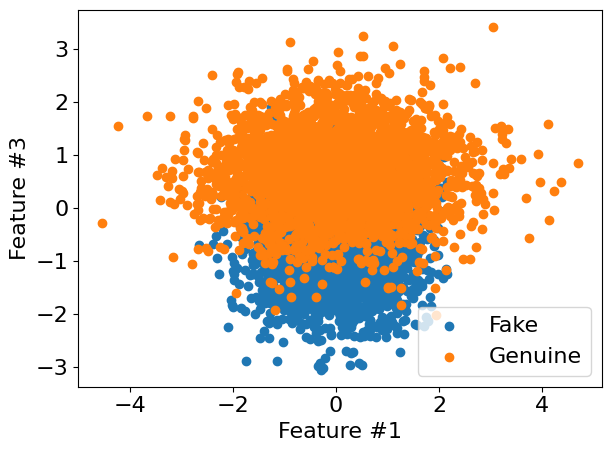

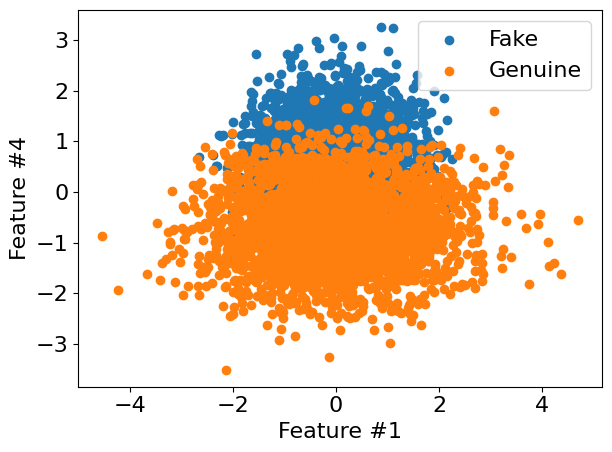

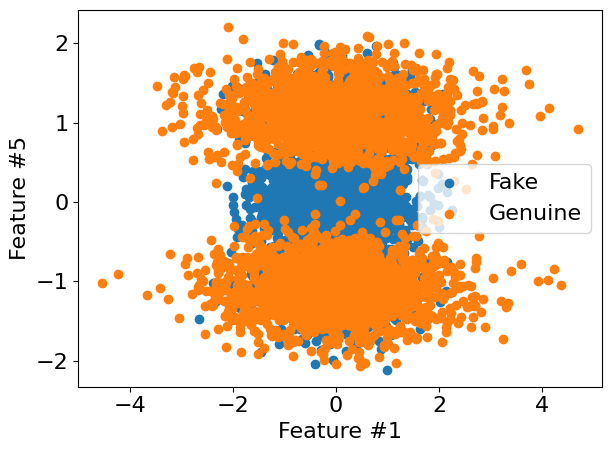

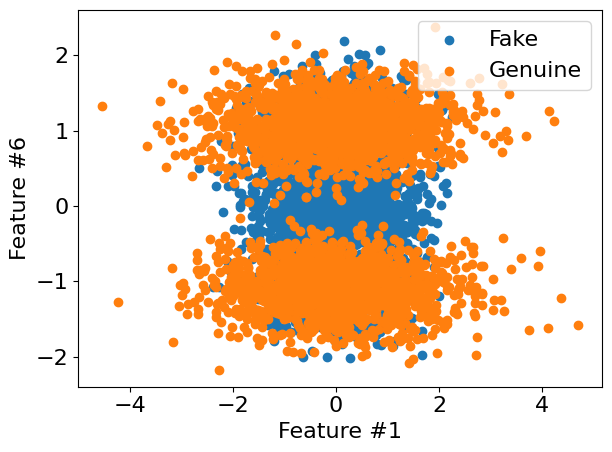

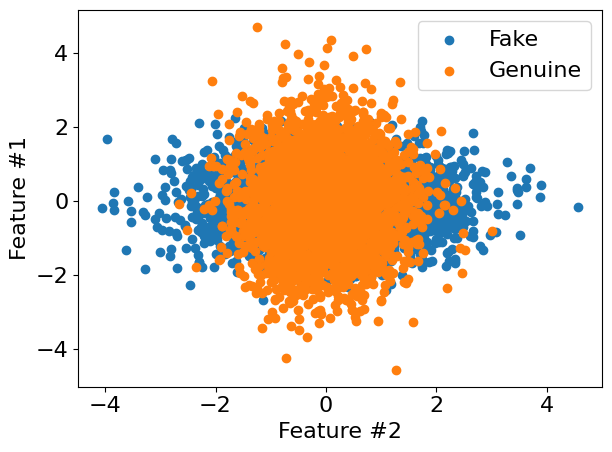

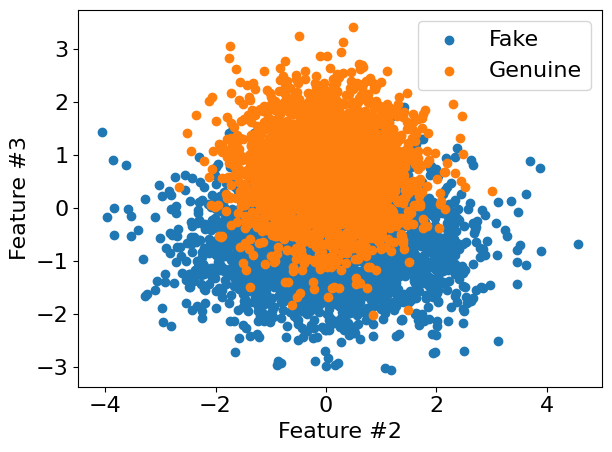

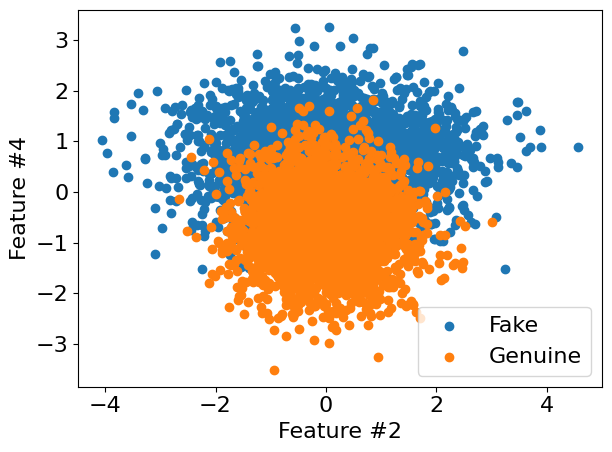

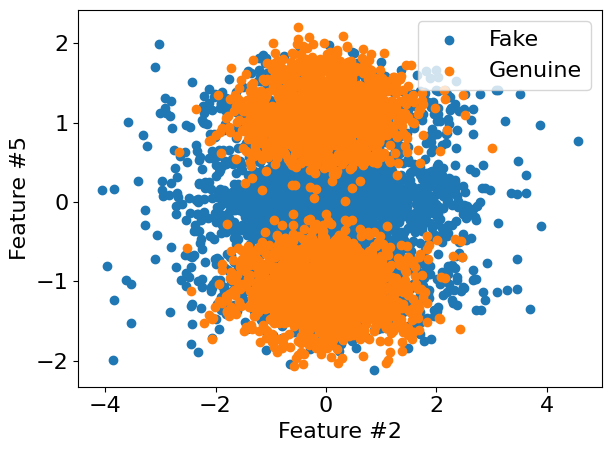

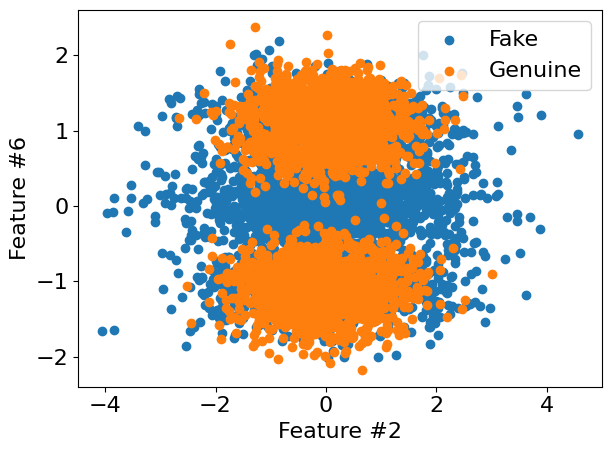

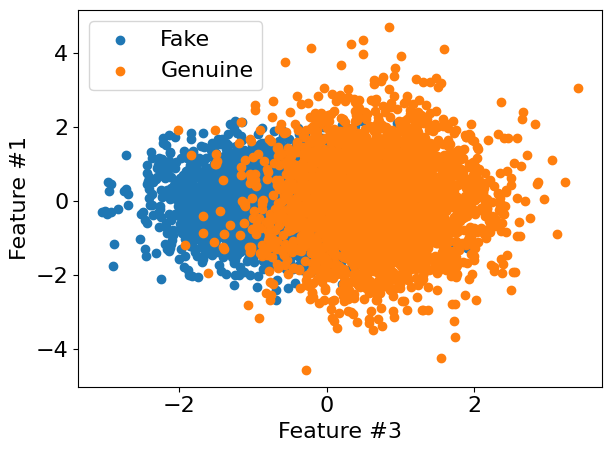

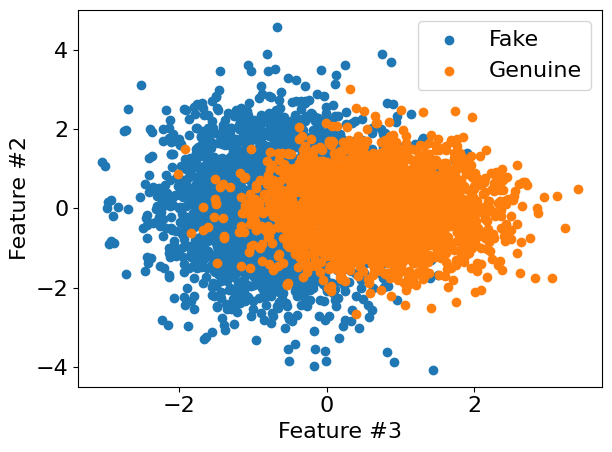

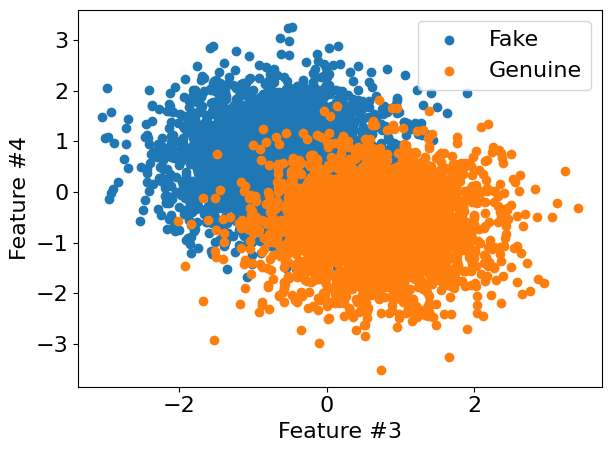

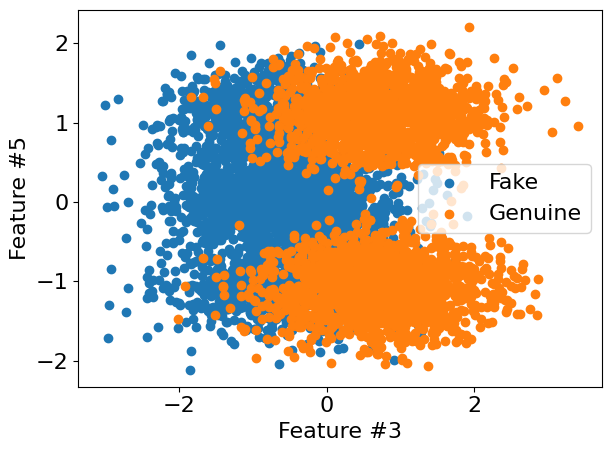

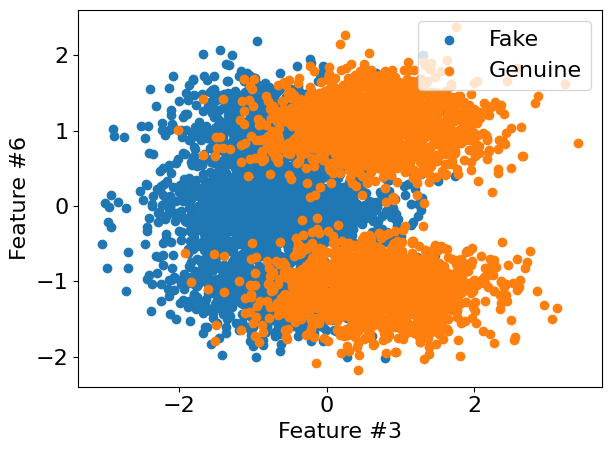

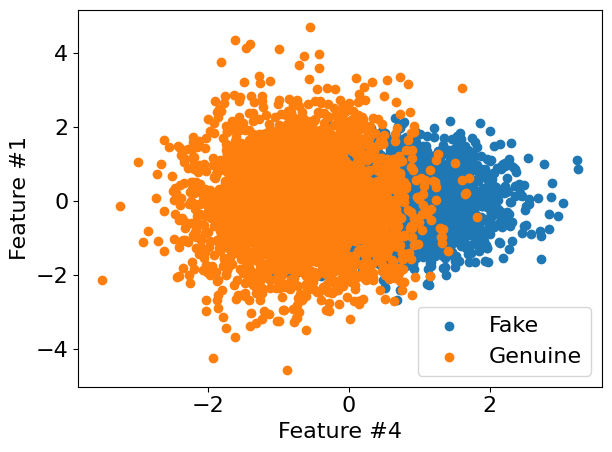

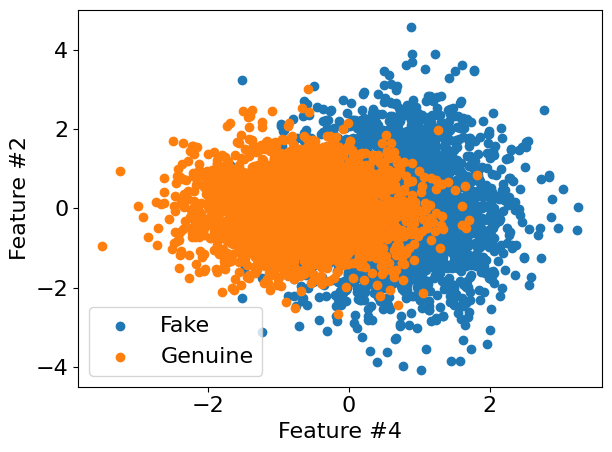

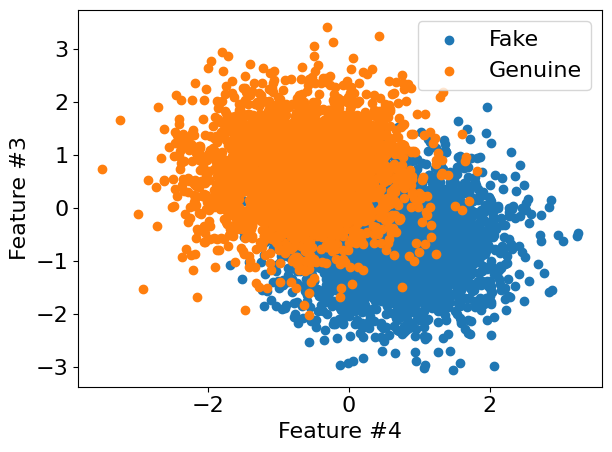

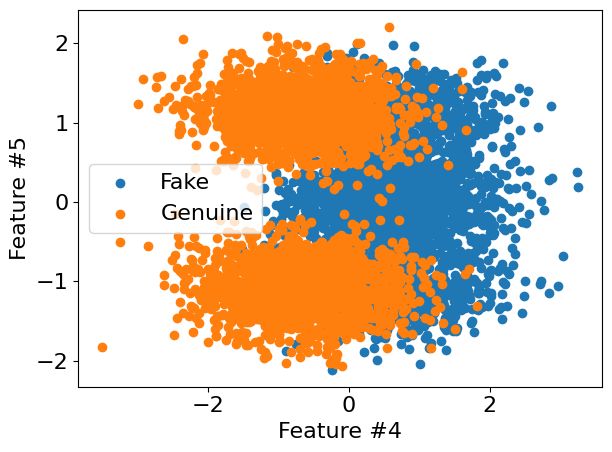

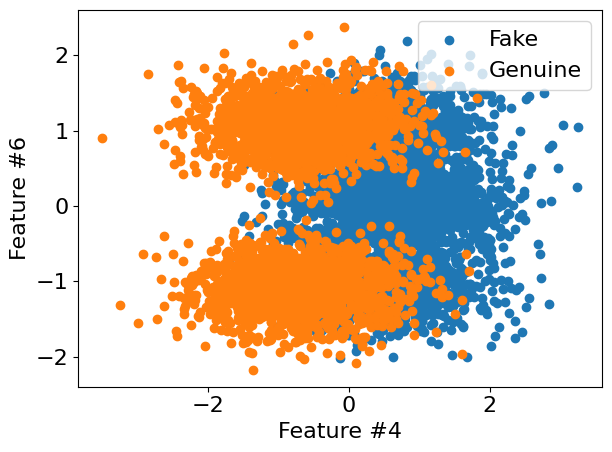

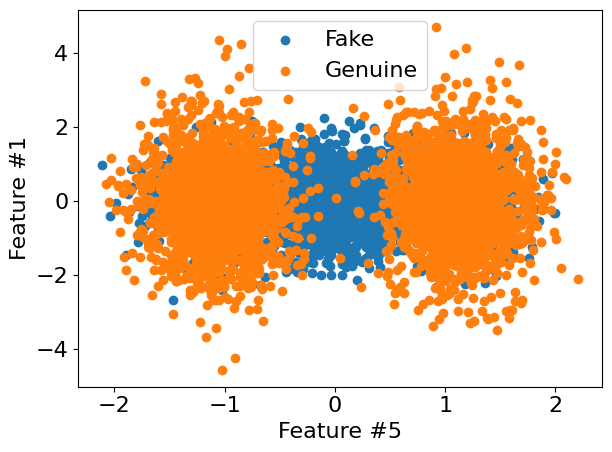

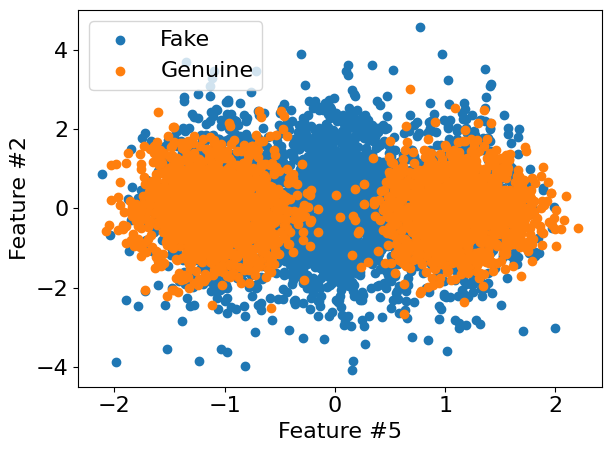

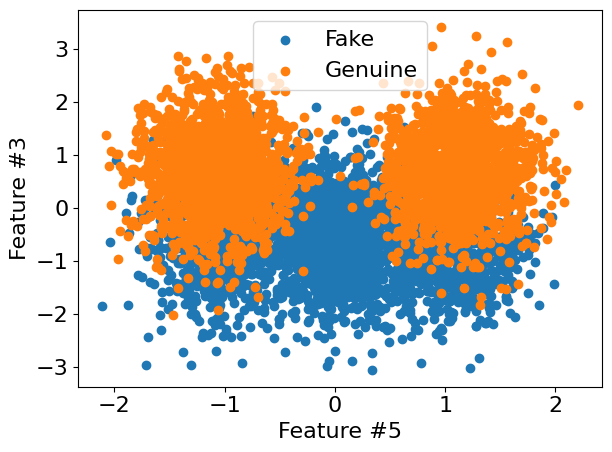

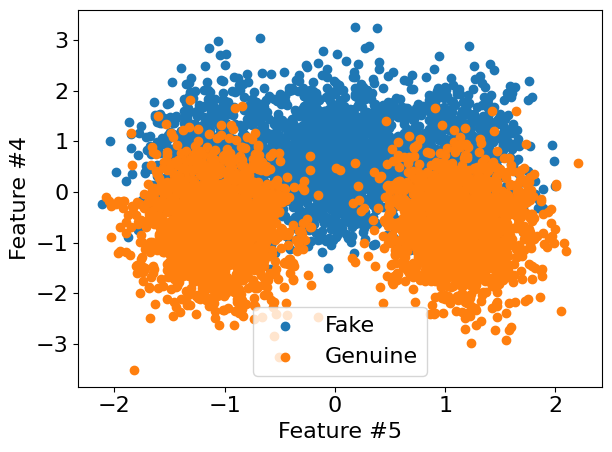

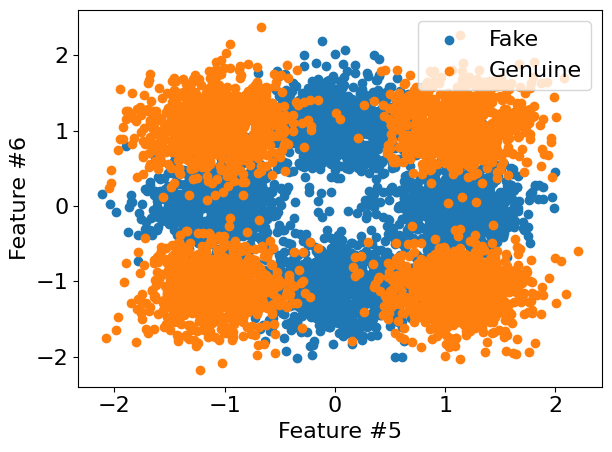

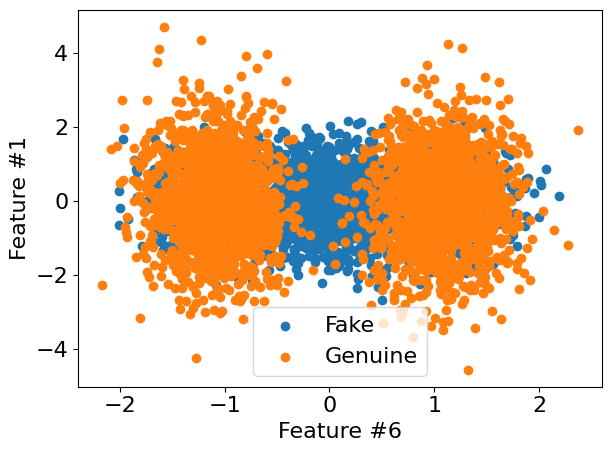

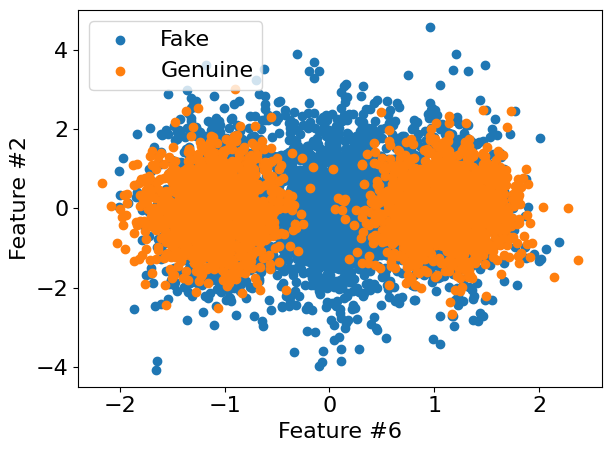

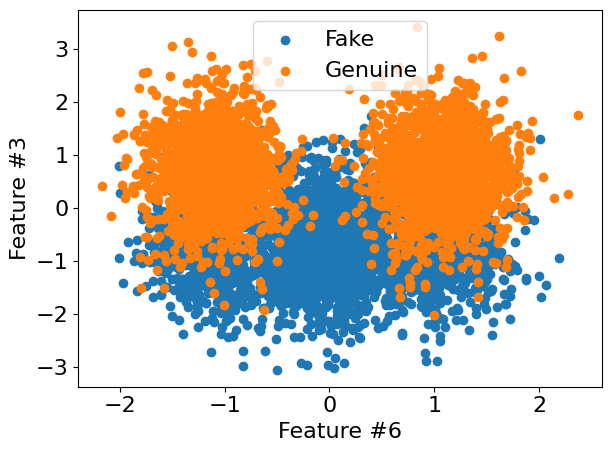

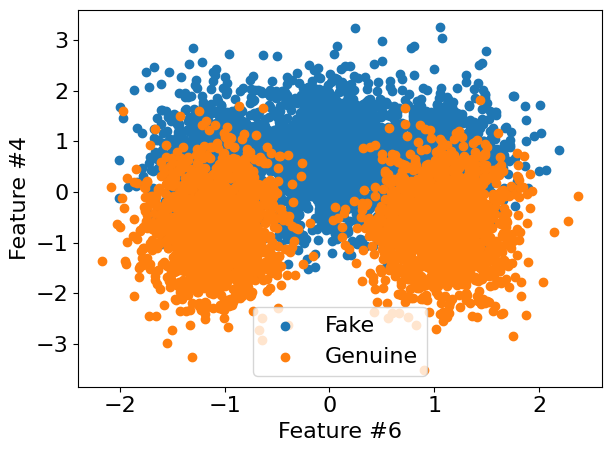

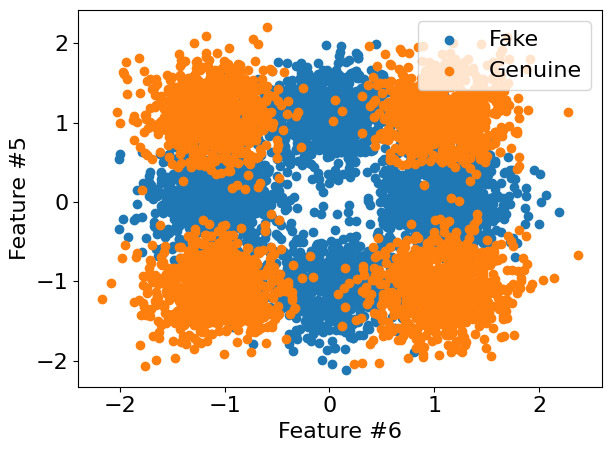

In [39]:
plot_scatter(D, L)

In [31]:
mu = D.mean(1).reshape((D.shape[0], 1))
print('Mean:')
print(mu)
print()

Mean:
[[ 0.00170711]
 [ 0.00503903]
 [-0.00560753]
 [ 0.00109537]
 [-0.00700025]
 [ 0.00910515]]



In [32]:
DC = D - mu

C = ((D - mu) @ (D - mu).T) / float(D.shape[1])
print('Covariance matrix:')
print(C)
print()

Covariance matrix:
[[ 1.00134304e+00  5.16755817e-03  1.76746375e-03  1.45268757e-02
   1.00066790e-02 -1.29591239e-02]
 [ 5.16755817e-03  9.98352699e-01 -1.58354137e-02 -4.40650280e-04
  -4.01307317e-03 -8.17687100e-04]
 [ 1.76746375e-03 -1.58354137e-02  1.00248180e+00 -4.37060381e-01
  -2.68600594e-02  6.34388503e-03]
 [ 1.45268757e-02 -4.40650280e-04 -4.37060381e-01  9.90293894e-01
   2.53357434e-02  8.26930215e-03]
 [ 1.00066790e-02 -4.01307317e-03 -2.68600594e-02  2.53357434e-02
   1.00119747e+00  8.75793087e-04]
 [-1.29591239e-02 -8.17687100e-04  6.34388503e-03  8.26930215e-03
   8.75793087e-04  9.97223742e-01]]



In [33]:
var = D.var(1)
std = D.std(1)
print('Variance:', var)
print('Std. dev.:', std)
print()

Variance: [1.00134304 0.9983527  1.0024818  0.99029389 1.00119747 0.99722374]
Std. dev.: [1.00067129 0.99917601 1.00124013 0.99513511 1.00059856 0.99861091]



In [34]:
for cls in [0, 1]:
        print('Class', cls)
        DCls = D[:, L==cls]
        mu = DCls.mean(1).reshape(DCls.shape[0], 1)
        print('Mean:')
        print(mu)
        C = ((DCls - mu) @ (DCls - mu).T) / float(DCls.shape[1])
        print('Covariance:')
        print(C)
        var = DCls.var(1)
        std = DCls.std(1)
        print('Variance:', var)
        print('Std. dev.:', std)
        print()

Class 0
Mean:
[[ 0.00287744]
 [ 0.01869316]
 [-0.68094016]
 [ 0.6708362 ]
 [ 0.02795697]
 [-0.0058274 ]]
Covariance:
[[ 5.69581054e-01  4.43400885e-03  8.43170041e-03  1.44479381e-02
   1.42672670e-02 -1.41150344e-03]
 [ 4.43400885e-03  1.42086571e+00 -4.75806611e-03 -1.22432969e-02
  -2.57280214e-03 -5.54092626e-03]
 [ 8.43170041e-03 -4.75806611e-03  5.49977025e-01  1.32035878e-02
  -1.15251868e-02  1.11043986e-02]
 [ 1.44479381e-02 -1.22432969e-02  1.32035878e-02  5.36042661e-01
   7.07380678e-03  1.59744284e-02]
 [ 1.42672670e-02 -2.57280214e-03 -1.15251868e-02  7.07380678e-03
   6.80073597e-01  1.20001652e-02]
 [-1.41150344e-03 -5.54092626e-03  1.11043986e-02  1.59744284e-02
   1.20001652e-02  7.05038438e-01]]
Variance: [0.56958105 1.42086571 0.54997702 0.53604266 0.6800736  0.70503844]
Std. dev.: [0.75470594 1.19200072 0.74160436 0.73214934 0.82466575 0.83966567]

Class 1
Mean:
[[ 5.44547838e-04]
 [-8.52437392e-03]
 [ 6.65237846e-01]
 [-6.64195349e-01]
 [-4.17251858e-02]
 [ 2.3938